In [2]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
dataCSV = os.path.join(os.getcwd(), "..", "DataExtractor", "FormattedStats", "CSGODataset.csv")
modelSaveFolder = os.path.join(os.getcwd(), "models")

df = pd.read_csv(dataCSV)

print(df.columns.tolist())

abs_correlations = df.corr()[['ScoreDifference']].abs()

# Sort absolute correlations in descending order
sorted_abs_correlations = abs_correlations.sort_values(by='ScoreDifference', ascending=False)

print(sorted_abs_correlations)



['Team1_Player1_HeadshotPercentage', 'Team1_Player1_K/R-Ratio', 'Team1_Player1_K/D-Ratio', 'Team1_Player1_Rating', 'Team1_Player2_HeadshotPercentage', 'Team1_Player2_K/R-Ratio', 'Team1_Player2_K/D-Ratio', 'Team1_Player2_Rating', 'Team1_Player3_HeadshotPercentage', 'Team1_Player3_K/R-Ratio', 'Team1_Player3_K/D-Ratio', 'Team1_Player3_Rating', 'Team1_Player4_HeadshotPercentage', 'Team1_Player4_K/R-Ratio', 'Team1_Player4_K/D-Ratio', 'Team1_Player4_Rating', 'Team1_Player5_HeadshotPercentage', 'Team1_Player5_K/R-Ratio', 'Team1_Player5_K/D-Ratio', 'Team1_Player5_Rating', 'Team2_Player1_HeadshotPercentage', 'Team2_Player1_K/R-Ratio', 'Team2_Player1_K/D-Ratio', 'Team2_Player1_Rating', 'Team2_Player2_HeadshotPercentage', 'Team2_Player2_K/R-Ratio', 'Team2_Player2_K/D-Ratio', 'Team2_Player2_Rating', 'Team2_Player3_HeadshotPercentage', 'Team2_Player3_K/R-Ratio', 'Team2_Player3_K/D-Ratio', 'Team2_Player3_Rating', 'Team2_Player4_HeadshotPercentage', 'Team2_Player4_K/R-Ratio', 'Team2_Player4_K/D-Ratio

In [14]:
features = df.drop('ScoreDifference', axis=1)

labels = df['ScoreDifference']

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27795, 40)
(6949, 40)
(27795,)
(6949,)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regressor = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [17]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

10.333107886026767


In [21]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [22]:
from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.1853504101309541


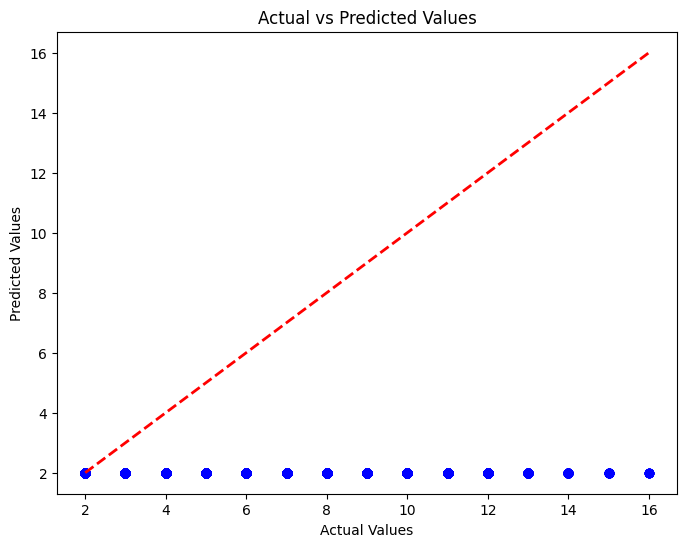

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()